# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
# Import Lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./Lego_dataset_cleaned.csv")
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10+',
 'ages_10-14',
 'ages_10-16',
 'ages_10-21',
 'ages_11-16',
 'ages_12+',
 'ages_12-16',
 'ages_14+',
 'ages_16+',
 'ages_1½-3',
 'ages_1½-5',
 'ages_2-5',
 'ages_4+',
 'ages_4-7',
 'ages_4-99',
 'ages_5+',
 'ages_5-12',
 'ages_5-8',
 'ages_6+',
 'ages_6-12',
 'ages_6-14',
 'ages_7+',
 'ages_7-12',
 'ages_7-14',
 'ages_8+',
 'ages_8-12',
 'ages_8-14',
 'ages_9+',
 'ages_9-12',
 'ages_9-14',
 'ages_9-16',
 'theme_name_Angry Birds™',
 'theme_name_Architecture',
 'theme_name_BOOST',
 "theme_name_Blue's Helicopter Pursuit",
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus Gyrosphere Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator 3-in-1',
 'theme_name_Creator Expert',
 'theme_name_DC Comics™ Super Heroes',
 'theme_name_DC Super Hero Girls',
 'theme_name_DIMENSIONS™',
 'theme_name_DUPLO®',
 'theme_name_Dilophosaurus Outpost Attack',
 'theme_name_Disn

In [4]:
#Your code here - Manipulate column names

In [5]:
subs = [(' ', '_'),('.',''),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]
list(df.columns)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_4_99',
 'ages_5plus',
 'ages_5_12',
 'ages_5_8',
 'ages_6plus',
 'ages_6_12',
 'ages_6_14',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_Angry_Birds',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_3_in_1',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DC_Super_Hero_Girls',
 'theme_name_DIMENSIONS',
 'theme_name_DUPLO',
 'theme_name_Dilophosaurus_Out

In [6]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [7]:
df.shape

(10870, 103)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [9]:
df.dtypes

piece_count                           float64
list_price                            float64
num_reviews                           float64
play_star_rating                      float64
star_rating                           float64
val_star_rating                       float64
ages_10plus                             int64
ages_10_14                              int64
ages_10_16                              int64
ages_10_21                              int64
ages_11_16                              int64
ages_12plus                             int64
ages_12_16                              int64
ages_14plus                             int64
ages_16plus                             int64
ages_1half_3                            int64
ages_1half_5                            int64
ages_2_5                                int64
ages_4plus                              int64
ages_4_7                                int64
ages_4_99                               int64
ages_5plus                        

In [10]:
#Your code here - Define the target and predictors

In [11]:
# Define the target and predictors
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [12]:
# Train/Test Split Data
train, test = train_test_split(df)
print(len(train), len(test))
train.head()

8152 2718


,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
9085,-0.516039,12.1878,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8831,-0.404154,58.3700,-0.286801,0.390333,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4698,-0.151510,30.0000,-0.370585,0.564601,-3.776502,-1.491638,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2715,0.018122,58.4922,-0.035451,0.738870,0.576116,0.439724,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4514,-0.507618,12.0000,-0.398512,0.216064,0.990651,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10plus,ages_10_14,ages_10_16,ages_10_21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very_Challenging,review_difficulty_Very_Easy,review_difficulty_unknown
2836,-0.056468,50.6922,-0.119234,0.041796,-0.460222,-1.008797,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8655,-0.234521,45.3700,-0.426440,1.087407,0.990651,1.244458,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10669,1.033511,176.8878,0.997879,-2.049427,-1.496559,-0.365010,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3587,2.115067,215.9520,4.488858,0.041796,0.161581,0.278777,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5834,0.332123,170.7390,0.187972,0.564601,0.161581,-0.365010,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
#Your code here - Fit the actual model

In [15]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     547.0
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:08:47   Log-Likelihood:                -40524.
No. Observations:                8152   AIC:                         8.124e+04
Df Residuals:                    8057   BIC:                         8.190e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.6119      1.686     38.321      0.000      61.307      67.917
piece_count                                         77.5595      0.893     86.848      0.000      75.809      79.310
num_reviews                                          6.9746      0.679     10.266      0.000       5.643       8.306
play_star_rating                                     5.0561      0.628      8.057      0.000       3.826       6.286
star_rating                                         -1.3010      0.714     -1.822      0.069      -2.701       0.099
val_star_rating                                     -8.4885      0.637    -13.333      0.000      -9.737      -7.241
ages_10plus                                        124.4535      6.673     18.651      0.000     111.373     137.534
ages_10_14                                         -20.6921     10.159     -2.037      0.042     -40.606      -0.778
ages_10_16                                         -12.6834      3.929     -3.228      0.001     -20.385      -4.982
ages_10_21                                          52.4025      7.471      7.014      0.000      37.757      67.048
ages_11_16                                         -13.9458      5.873     -2.375      0.018     -25.458      -2.434
ages_12plus                                         66.2205      5.533     11.969      0.000      55.375      77.066
ages_12_16                                         -61.5520      6.735     -9.139      0.000     -74.754     -48.350
ages_14plus                                         19.5046      4.115      4.740      0.000      11.439      27.570
ages_16plus                                         24.9780      6.046      4.132      0.000      13.127      36.829
ages_1half_3                                        -8.6455      2.415     -3.579      0.000     -13.380      -3.911
ages_1half_5                                        -3.7742      3.160     -1.194      0.232      -9.969       2.421
ages_2_5                                            15.4670      1.715      9.020      0.000      12.106      18.828
ages_4plus                                         -19.7293      6.309     -3.127      0.002     -32.097      -7.362
ages_4_7                                            -6.0260      3.253     -1.853      0.064     -12.402       0.350
ages_4_99                                           -2.0443      3.589     -0.570      0.569      -9.080       4.992
ages_5plus                                          -8.9261      3.058     -2.919      0.004     -14.921      -2.931
ages_5_12                                          -31.9069      3.118    -10.234      0.000     -38.019     -25.795
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [16]:
#Your code here - Remove features which do not appear to be statistically relevant

In [17]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
#print(summary)
p_table = summary.tables[1]
#print(p_table)
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
#print(f"p_table.columns: {p_table.columns}")
p_table = p_table.drop(0)
#print(f"p_table.drop_0: {p_table.columns}")
p_table = p_table.set_index(p_table.columns[0])
#print(p_table)
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

103 69
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,64.6119,1.686,38.321,0.000,61.307,67.917
piece_count,77.5595,0.893,86.848,0.000,75.809,79.310
num_reviews,6.9746,0.679,10.266,0.000,5.643,8.306
play_star_rating,5.0561,0.628,8.057,0.000,3.826,6.286
star_rating,-1.3010,0.714,-1.822,0.069,-2.701,0.099


In [18]:
#Your code here - Refit the model
# Refit model#2 -  with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     755.6
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:08:47   Log-Likelihood:                -40538.
No. Observations:                8152   AIC:                         8.121e+04
Df Residuals:                    8083   BIC:                         8.170e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.2996      1.537     42.489      0.000      62.287      68.312
piece_count                                         77.7535      0.870     89.350      0.000      76.048      79.459
num_reviews                                          6.9446      0.665     10.443      0.000       5.641       8.248
play_star_rating                                     4.4885      0.522      8.598      0.000       3.465       5.512
val_star_rating                                     -9.0282      0.496    -18.208      0.000     -10.000      -8.056
ages_10plus                                        118.8017      4.728     25.125      0.000     109.533     128.071
ages_10_14                                         -16.2259     10.550     -1.538      0.124     -36.907       4.456
ages_10_16                                          -8.7183      3.764     -2.316      0.021     -16.098      -1.339
ages_10_21                                          43.6473      3.211     13.594      0.000      37.353      49.941
ages_11_16                                         -10.5584      5.727     -1.844      0.065     -21.784       0.667
ages_12plus                                         66.3091      6.040     10.978      0.000      54.469      78.149
ages_12_16                                         -55.9560      7.016     -7.975      0.000     -69.710     -42.202
ages_14plus                                         23.1437      4.740      4.883      0.000      13.852      32.435
ages_16plus                                         27.2182      6.736      4.041      0.000      14.014      40.422
ages_1half_3                                        -1.6871      3.065     -0.550      0.582      -7.695       4.321
ages_2_5                                            21.9138      1.986     11.032      0.000      18.020      25.808
ages_4plus                                         -19.5500      9.614     -2.033      0.042     -38.396      -0.704
ages_5plus                                          -7.9846      3.002     -2.660      0.008     -13.869      -2.100
ages_5_12                                          -26.7102      2.668    -10.010      0.000     -31.941     -21.480
ages_6plus                                         -19.7019      5.717     -3.446      0.001     -30.910      -8.494
ages_6_12                                          -15.2657      1.856     -8.223      0.000     -18.905     -11.627
ages_7_12                                          -14.8953      2.233     -6.671      0.000     -19.272     -10.518
ages_7_14                                          -10.4177      1.910     -5.453      0.000     -14.163      -6.673
ages_8plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [19]:
#Your code here - Continue to refine the model

In [20]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

70 58
['piece_count', 'num_reviews', 'play_star_rating', 'val_star_rating', 'ages_10plus']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,65.2996,1.537,42.489,0.0,62.287,68.312
piece_count,77.7535,0.870,89.350,0.0,76.048,79.459
num_reviews,6.9446,0.665,10.443,0.0,5.641,8.248
play_star_rating,4.4885,0.522,8.598,0.0,3.465,5.512
val_star_rating,-9.0282,0.496,-18.208,0.0,-10.000,-8.056


In [21]:
# Refit model#3 -  with subset features
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     899.8
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:08:47   Log-Likelihood:                -40549.
No. Observations:                8152   AIC:                         8.121e+04
Df Residuals:                    8094   BIC:                         8.162e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           65.5837      1.279     51.262      0.000      63.076      68.092
piece_count                                         77.2879      0.814     94.919      0.000      75.692      78.884
num_reviews                                          6.9041      0.663     10.420      0.000       5.605       8.203
play_star_rating                                     4.5748      0.520      8.803      0.000       3.556       5.593
val_star_rating                                     -9.0103      0.495    -18.204      0.000      -9.981      -8.040
ages_10plus                                        120.5920      4.663     25.861      0.000     111.451     129.733
ages_10_16                                          -6.7897      3.628     -1.872      0.061     -13.901       0.321
ages_10_21                                          44.3285      3.153     14.059      0.000      38.148      50.509
ages_12plus                                         69.2933      5.893     11.758      0.000      57.741      80.846
ages_12_16                                         -52.8883      6.841     -7.731      0.000     -66.299     -39.478
ages_14plus                                         26.7222      4.489      5.952      0.000      17.922      35.523
ages_16plus                                         32.2830      6.338      5.094      0.000      19.859      44.707
ages_2_5                                            22.7429      1.881     12.090      0.000      19.055      26.430
ages_4plus                                         -19.3662      9.618     -2.014      0.044     -38.219      -0.513
ages_5plus                                          -7.6328      2.987     -2.555      0.011     -13.488      -1.778
ages_5_12                                          -25.0741      2.579     -9.721      0.000     -30.130     -20.018
ages_6plus                                         -18.3692      5.682     -3.233      0.001     -29.508      -7.231
ages_6_12                                          -13.2559      1.695     -7.820      0.000     -16.579      -9.933
ages_7_12                                          -13.6078      2.120     -6.419      0.000     -17.763      -9.452
ages_7_14                                           -8.9770      1.787     -5.024      0.000     -12.480      -5.474
ages_8plus                                          14.6528      4.476      3.273      0.001       5.878      23.428
ages_8_12                                          -13.6644      2.633     -5.190      0.000     -18.825      -8.504
ages_8_14                                           -8.5192      1.911     -4.457      0.000     -12.266      -4.773
ages_9plus                               

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

In [22]:
#Your code here - Code a way to identify multicollinearity

In [23]:
# Your code here
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

C:\Users\deon\Anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('piece_count', 4.090219913430985),
 ('num_reviews', 2.870578651659281),
 ('play_star_rating', 1.7831810486711437),
 ('val_star_rating', 1.6047617894567043),
 ('ages_10plus', 7.136738017246427),
 ('ages_10_16', 1.141465302968145),
 ('ages_10_21', 1.049453977410037),
 ('ages_12plus', 6.109397245409216),
 ('ages_12_16', 1.144193670408173),
 ('ages_14plus', 2.073773045531806),
 ('ages_16plus', 8.828003453177221),
 ('ages_2_5', 1.1724432285681257),
 ('ages_4plus', 1.1971884080354556),
 ('ages_5plus', inf),
 ('ages_5_12', 3.0946996337013624),
 ('ages_6plus', 2.6541013362942736),
 ('ages_6_12', 1.7333962441017494),
 ('ages_7_12', 1.4467664495320223),
 ('ages_7_14', 1.6827729471069088),
 ('ages_8plus', 2.576343974152284),
 ('ages_8_12', 1.2576535467225578),
 ('ages_8_14', 1.7908507895326096),
 ('ages_9plus', 1.4068167523880142),
 ('ages_9_12', 1.0173693367311625),
 ('ages_9_14', 1.7679480043794997),
 ('theme_name_Architecture', 5.167045098564661),
 ('theme_name_BOOST', 1.0593731896205951),
 

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [24]:
#Your code here - Subset features based on multicollinearity

In [25]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

58 51


In [26]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     903.7
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        09:08:52   Log-Likelihood:                -40925.
No. Observations:                8152   AIC:                         8.195e+04
Df Residuals:                    8100   BIC:                         8.232e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           67.2444      1.080     62.267      0.000      65.127      69.361
piece_count                                         78.7212      0.668    117.787      0.000      77.411      80.031
num_reviews                                          4.9684      0.644      7.711      0.000       3.705       6.231
play_star_rating                                     5.6883      0.493     11.529      0.000       4.721       6.655
val_star_rating                                    -10.7406      0.496    -21.667      0.000     -11.712      -9.769
ages_10_16                                         -13.4490      3.584     -3.752      0.000     -20.475      -6.423
ages_10_21                                          42.0379      3.243     12.963      0.000      35.681      48.395
ages_12_16                                         -63.2721      6.784     -9.327      0.000     -76.571     -49.974
ages_14plus                                          6.6808      3.929      1.700      0.089      -1.021      14.383
ages_2_5                                            21.0662      1.845     11.419      0.000      17.450      24.682
ages_4plus                                          -8.2208     10.007     -0.822      0.411     -27.837      11.396
ages_5_12                                          -27.5484      2.611    -10.552      0.000     -32.666     -22.431
ages_6plus                                         -21.5816      5.902     -3.656      0.000     -33.152     -10.011
ages_6_12                                          -17.3891      1.608    -10.814      0.000     -20.541     -14.237
ages_7_12                                          -17.0207      2.092     -8.135      0.000     -21.122     -12.919
ages_7_14                                          -12.3706      1.729     -7.153      0.000     -15.761      -8.981
ages_8plus                                           1.9908      4.544      0.438      0.661      -6.917      10.899
ages_8_12                                          -17.5157      2.595     -6.750      0.000     -22.603     -12.429
ages_8_14                                          -13.8802      1.827     -7.599      0.000     -17.461     -10.299
ages_9plus                                          22.0676     10.826      2.038      0.042       0.846      43.289
ages_9_12                                          -28.2147      6.515     -4.331      0.000     -40.986     -15.444
ages_9_14                                          -13.5375      2.571     -5.266      0.000     -18.577      -8.498
theme_name_BOOST                                    85.1500     10.096      8.434      0.000      65.360     104.940
theme_name_Blues_Helicopter_Pursuit      

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

In [27]:
# Your code here - Check that the residuals are normally distributed

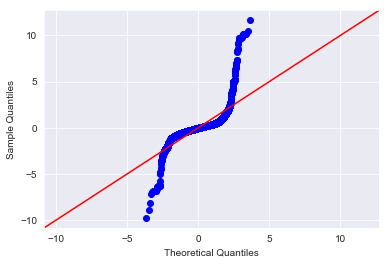

In [28]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

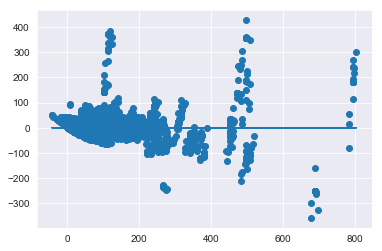

In [29]:
#Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [33]:
#Your code here - Check for outliers

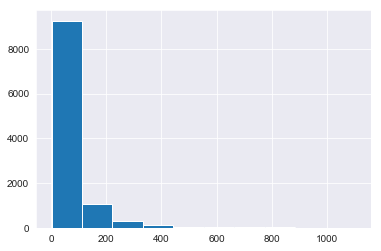

In [34]:
df.list_price.hist()

In [35]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.list_price.quantile(q=q)))

0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [36]:
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)



Percent removed: 0.010487580496780129


In [37]:
#Your code here - Rerun the model with extreme outliers removed

In [38]:
# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     512.1
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        10:54:50   Log-Likelihood:                -4762.6
No. Observations:                8067   AIC:                             9629.
Df Residuals:                    8015   BIC:                             9993.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            3.3751      0.013    258.647      0.000       3.350       3.401
piece_count                                          0.6068      0.010     63.804      0.000       0.588       0.625
num_reviews                                          0.0245      0.008      3.021      0.003       0.009       0.040
play_star_rating                                     0.0937      0.006     15.786      0.000       0.082       0.105
val_star_rating                                     -0.1471      0.006    -24.842      0.000      -0.159      -0.136
ages_10_16                                           0.6391      0.046     13.967      0.000       0.549       0.729
ages_10_21                                           0.7829      0.040     19.598      0.000       0.705       0.861
ages_12_16                                           0.0993      0.082      1.210      0.226      -0.062       0.260
ages_14plus                                          0.3849      0.053      7.247      0.000       0.281       0.489
ages_2_5                                             0.5518      0.022     25.341      0.000       0.509       0.594
ages_4plus                                          -1.4927      0.117    -12.762      0.000      -1.722      -1.263
ages_5_12                                           -0.6344      0.031    -20.296      0.000      -0.696      -0.573
ages_6plus                                          -0.8368      0.066    -12.589      0.000      -0.967      -0.707
ages_6_12                                           -0.0446      0.019     -2.285      0.022      -0.083      -0.006
ages_7_12                                            0.2003      0.024      8.215      0.000       0.153       0.248
ages_7_14                                            0.0916      0.021      4.462      0.000       0.051       0.132
ages_8plus                                           0.5933      0.054     10.895      0.000       0.487       0.700
ages_8_12                                            0.3360      0.031     10.854      0.000       0.275       0.397
ages_8_14                                            0.4360      0.022     19.981      0.000       0.393       0.479
ages_9plus                                           0.2696      0.122      2.207      0.027       0.030       0.509
ages_9_12                                            0.4384      0.078      5.644      0.000       0.286       0.591
ages_9_14                                            0.5993      0.030     19.677      0.000       0.540       0.659
theme_name_BOOST                                     0.9461      0.113      8.376      0.000       0.725       1.168
theme_name_Blues_Helicopter_Pursuit      

In [39]:
#Your code here - Check normality and homoscedasticity assumptions

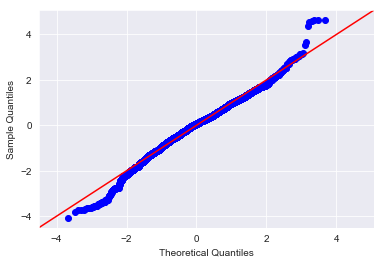

In [40]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 